In [ ]:
import tensorflow as tf
import torch
# Check if TensorFlow detects a GPU
print("Num GPUs Available in Tensorflow:", len(tf.config.experimental.list_physical_devices('GPU')))
# List available GPUs
print(tf.config.experimental.list_physical_devices('GPU'))
# Check if GPU is available
print("Is GPU available:", torch.cuda.is_available())

# Get GPU details for pytorch
if torch.cuda.is_available():
    print("Gpu available in pytorch")
    print("GPU Name:", torch.cuda.get_device_name(0))
    print("CUDA Version:", torch.version.cuda)
    print("cuDNN Version:", torch.backends.cudnn.version())
    print("Number of GPUs:", torch.cuda.device_count())
    print("Current GPU:", torch.cuda.current_device())


In [ ]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping  
import glob as gb 
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
IMG_SIZE = 224
SEED = 1000
BATCH_SIZE = 16
TRAIN_DIR = '/media/rogerthattan/Toshiba/Thesis/Dataset/Train_Data'
TEST_DIR = '/media/rogerthattan/Toshiba/Thesis/Dataset/Test_Data'

In [ ]:
categories = []
class_count=[]
train_exm = 0
for f in os.listdir(TRAIN_DIR):
    files = gb.glob(pathname=str(TRAIN_DIR + '/' + f + '/*.jpg'))
    categories.append(f)
    class_count.append(len(files))
    train_exm += len(files)

sns.barplot(x=categories, y=class_count).set_title("Distribution of train data")

plt.show()
print(train_exm)

In [ ]:
# def preprocess_input(img):
#     img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
#     img = tf.keras.applications.efficientnet.preprocess_input(img)
#     return img

train_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    shear_range=0.1,
    validation_split=0.2,
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
    #dtype=tf.float32

)

test_gen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
    #dtype=tf.float32
)

In [ ]:
train_batch = train_gen.flow_from_directory(
    directory = TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset = 'training',
    seed=SEED
)

valid_batch = train_gen.flow_from_directory(
    directory = TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset = 'validation',
    seed=SEED
)

test_batch = test_gen.flow_from_directory(
    directory = TEST_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    seed = SEED
)

In [ ]:
img_shape = (IMG_SIZE, IMG_SIZE) + (3,)
base_model = tf.keras.applications.ResNet50(input_shape=img_shape, include_top=False, weights='imagenet')
base_model.summary()


In [ ]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
num_classes = len(train_batch.class_indices)

# Assuming you have a convolutional or feature extraction base model

x = base_model.output
x = Flatten()(x)  # Flatten the output to a 1D tensor
x = Dense(num_classes, activation='softmax')(x)  # Dense layer with 'softmax' activation for classification

# Create the new model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Now fit the model
h = model.fit(train_batch,
              steps_per_epoch=642,
              validation_data=valid_batch,
              validation_steps=158,
              epochs=50,
              callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)],
              verbose=1)


2025-03-09 00:23:35.940550: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741458215.954859   74378 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741458215.958740   74378 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-09 00:23:35.973214: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Using CPU only mode


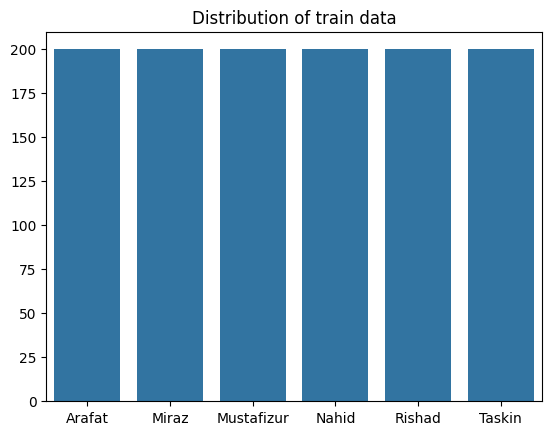

Total training examples: 1200
Found 960 images belonging to 6 classes.
Found 240 images belonging to 6 classes.
Found 300 images belonging to 6 classes.
Steps per epoch: 60
Validation steps: 15


2025-03-09 00:23:38.343145: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-03-09 00:23:38.343169: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:137] retrieving CUDA diagnostic information for host: rogerthattan
2025-03-09 00:23:38.343175: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:144] hostname: rogerthattan
2025-03-09 00:23:38.343276: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:168] libcuda reported version is: 550.120.0
2025-03-09 00:23:38.343294: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:172] kernel reported version is: 550.120.0
2025-03-09 00:23:38.343298: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:259] kernel version seems to match DSO: 550.120.0


94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 67s 1us/step
Model created successfully
Testing model with a small batch...
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.1250 - loss: 2.0336
Small batch test successful, proceeding with full training


/home/rogerthattan/miniconda3/envs/env_gpu/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 38s 637ms/step - accuracy: 0.6843 - loss: 0.9740 - val_accuracy: 0.9583 - val_loss: 0.1960
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 35s 574ms/step - accuracy: 0.9504 - loss: 0.1544 - val_accuracy: 0.9708 - val_loss: 0.1094
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 33s 546ms/step - accuracy: 0.9563 - loss: 0.1301 - val_accuracy: 0.9000 - val_loss: 0.3046
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 33s 545ms/step - accuracy: 0.9575 - loss: 0.1340 - val_accuracy: 0.9708 - val_loss: 0.1017
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 33s 544ms/step - accuracy: 0.9691 - loss: 0.0816 - val_accuracy: 0.9417 - val_loss: 0.1452
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 33s 546ms/step - accuracy: 0.9579 - loss: 0.1383 - val_accuracy: 0.9792 - val_loss: 0.1055
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 34s 560ms/step - accuracy: 0.9666 - loss: 0.0806 - val_accuracy: 0.9417 - val_loss: 0.1636
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 33s 552ms/step - accuracy: 0.9670 - loss: 0.0735 - val_accu

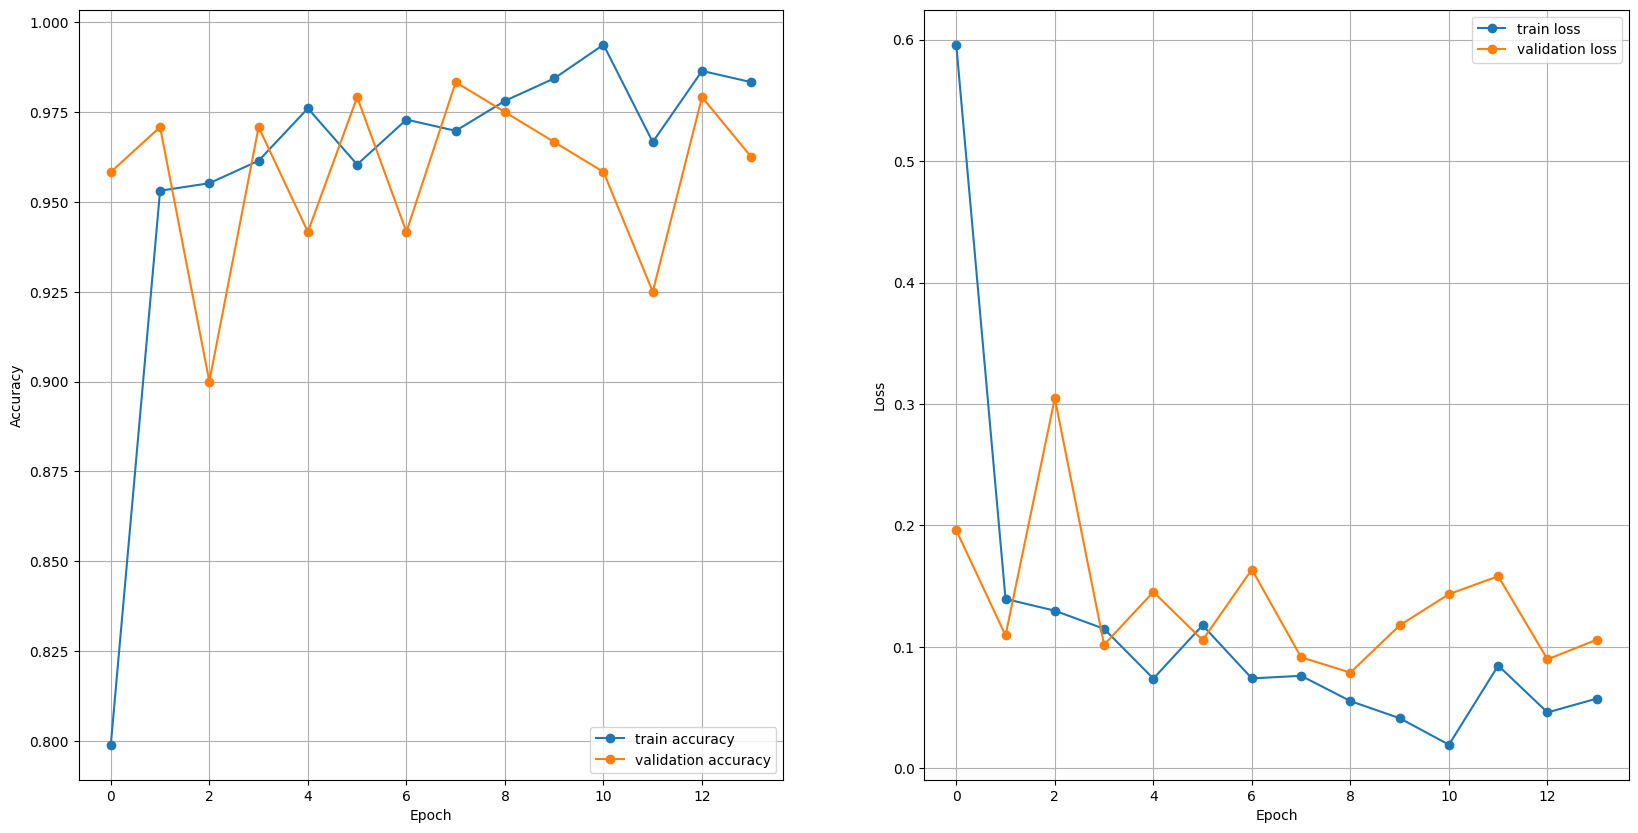

Model saved successfully


In [1]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import glob as gb 
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Force TensorFlow to use CPU only (to avoid GPU issues)
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
print("Using CPU only mode")

# Configuration
IMG_SIZE = 224
SEED = 1000
BATCH_SIZE = 16
TRAIN_DIR = '/media/rogerthattan/Toshiba/Thesis/Dataset/Train_Data'
TEST_DIR = '/media/rogerthattan/Toshiba/Thesis/Dataset/Test_Data'

# Analyze dataset
categories = []
class_count = []
train_exm = 0
for f in os.listdir(TRAIN_DIR):
    files = gb.glob(pathname=str(TRAIN_DIR + '/' + f + '/*.jpg'))
    categories.append(f)
    class_count.append(len(files))
    train_exm += len(files)

# Plot class distribution
sns.barplot(x=categories, y=class_count).set_title("Distribution of train data")
plt.show()
print(f"Total training examples: {train_exm}")

# Data generators with simpler preprocessing
train_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    shear_range=0.1,
    validation_split=0.2,
    rescale=1./255  # Simple rescaling instead of complex preprocessing
)

test_gen = ImageDataGenerator(
    rescale=1./255
)

train_batch = train_gen.flow_from_directory(
    directory=TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='training',
    seed=SEED
)

valid_batch = train_gen.flow_from_directory(
    directory=TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='validation',
    seed=SEED
)

test_batch = test_gen.flow_from_directory(
    directory=TEST_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    seed=SEED
)

# Calculate steps per epoch
steps_per_epoch = len(train_batch)
validation_steps = len(valid_batch)

print(f"Steps per epoch: {steps_per_epoch}")
print(f"Validation steps: {validation_steps}")

# Build a simpler ResNet model
img_shape = (IMG_SIZE, IMG_SIZE, 3)
num_classes = len(categories)

# Use a smaller ResNet model
base_model = tf.keras.applications.ResNet50V2(
    input_shape=img_shape,
    include_top=False,
    weights='imagenet'
)

# Freeze the base model layers
base_model.trainable = False

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the complete model
model = Model(inputs=base_model.input, outputs=predictions)

# Display model summary
print("Model created successfully")

# Compile the model with a simpler optimizer
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Define callbacks
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True)
]

# Try to train with a very small number of steps first to test
try:
    print("Testing model with a small batch...")
    x_sample, y_sample = next(iter(train_batch))
    model.fit(x_sample, y_sample, epochs=1, verbose=1)
    print("Small batch test successful, proceeding with full training")
    
    # Train the model
    h = model.fit(
        train_batch,
        steps_per_epoch=steps_per_epoch,
        validation_data=valid_batch,
        validation_steps=validation_steps,
        epochs=50,
        callbacks=callbacks,
        verbose=1
    )
    
    # Plot training history
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
    plt.plot(h.history['val_accuracy'], 'o-', label='validation accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend(loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(h.history['loss'], 'o-', label='train loss')
    plt.plot(h.history['val_loss'], 'o-', label='validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.legend(loc='upper right')
    plt.show()
    
except Exception as e:
    print(f"Error during training: {e}")
    
    # Alternative approach if the above fails
    print("\nTrying alternative approach with manual batching...")
    
    # Create a simpler model
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
    
    simple_model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=img_shape),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    
    simple_model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    # Train with the simpler model
    h = simple_model.fit(
        train_batch,
        steps_per_epoch=steps_per_epoch,
        validation_data=valid_batch,
        validation_steps=validation_steps,
        epochs=20,
        callbacks=[EarlyStopping(patience=3, restore_best_weights=True)],
        verbose=1
    )
    
    # Plot training history for the simple model
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
    plt.plot(h.history['val_accuracy'], 'o-', label='validation accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend(loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(h.history['loss'], 'o-', label='train loss')
    plt.plot(h.history['val_loss'], 'o-', label='validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.legend(loc='upper right')
    plt.show()

# Save the model
try:
    model.save('resnet_model.h5')
    print("Model saved successfully")
except Exception as e:
    print(f"Error saving model: {e}")
    try:
        # Try saving in TensorFlow SavedModel format instead
        model.save('resnet_model')
        print("Model saved in SavedModel format")
    except Exception as e2:
        print(f"Error saving in SavedModel format: {e2}")

Using device: cuda


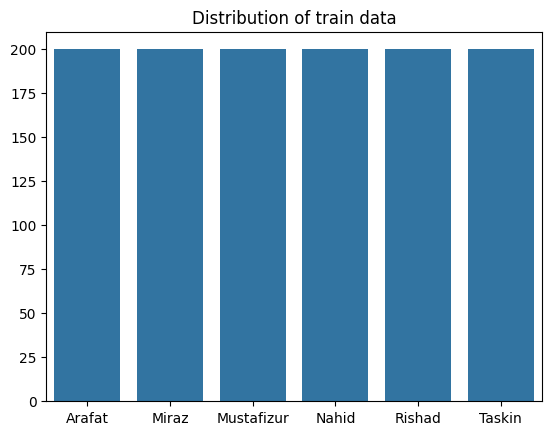

Total training examples: 1200
Number of classes: 6
Train batches: 60
Validation batches: 15
Test batches: 19


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /home/rogerthattan/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [01:12<00:00, 1.41MB/s]
/home/rogerthattan/miniconda3/envs/env_gpu/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Model created successfully
Epoch 1/50


Validating: 100%|██████████| 15/15 [00:01<00:00, 11.39it/s]


Train Loss: 1.4509, Train Acc: 0.4208
Val Loss: 0.6402, Val Acc: 0.9292
Saved best model
Epoch 2/50


Validating: 100%|██████████| 15/15 [00:01<00:00, 11.86it/s]


Train Loss: 0.5739, Train Acc: 0.8240
Val Loss: 0.1305, Val Acc: 0.9833
Saved best model
Epoch 3/50


Validating: 100%|██████████| 15/15 [00:01<00:00, 11.32it/s]


Train Loss: 0.3002, Train Acc: 0.9104
Val Loss: 0.0732, Val Acc: 0.9875
Saved best model
Epoch 4/50


Validating: 100%|██████████| 15/15 [00:01<00:00, 11.70it/s]


Train Loss: 0.1783, Train Acc: 0.9490
Val Loss: 0.0356, Val Acc: 0.9958
Saved best model
Epoch 5/50


Validating: 100%|██████████| 15/15 [00:01<00:00, 11.52it/s]


Train Loss: 0.1679, Train Acc: 0.9500
Val Loss: 0.1352, Val Acc: 0.9333
Epoch 6/50


Validating: 100%|██████████| 15/15 [00:01<00:00, 12.40it/s]


Train Loss: 0.2118, Train Acc: 0.9208
Val Loss: 0.0288, Val Acc: 0.9958
Saved best model
Epoch 7/50


Validating: 100%|██████████| 15/15 [00:01<00:00, 11.75it/s]


Train Loss: 0.1376, Train Acc: 0.9552
Val Loss: 0.0144, Val Acc: 0.9958
Saved best model
Epoch 8/50


Validating: 100%|██████████| 15/15 [00:01<00:00, 11.18it/s]


Train Loss: 0.1453, Train Acc: 0.9490
Val Loss: 0.0219, Val Acc: 0.9958
Epoch 9/50


Validating: 100%|██████████| 15/15 [00:01<00:00, 11.60it/s]


Train Loss: 0.0998, Train Acc: 0.9635
Val Loss: 0.0141, Val Acc: 0.9958
Saved best model
Epoch 10/50


Validating: 100%|██████████| 15/15 [00:01<00:00, 13.19it/s]


Train Loss: 0.1012, Train Acc: 0.9667
Val Loss: 0.0195, Val Acc: 0.9958
Epoch 11/50


Validating: 100%|██████████| 15/15 [00:01<00:00, 12.55it/s]


Train Loss: 0.1544, Train Acc: 0.9479
Val Loss: 0.0246, Val Acc: 0.9958
Epoch 12/50


Validating: 100%|██████████| 15/15 [00:01<00:00, 12.44it/s]


Train Loss: 0.1342, Train Acc: 0.9594
Val Loss: 0.0210, Val Acc: 0.9958
Epoch 13/50


Validating: 100%|██████████| 15/15 [00:01<00:00, 11.55it/s]


Train Loss: 0.1168, Train Acc: 0.9625
Val Loss: 0.0121, Val Acc: 0.9958
Saved best model
Epoch 14/50


Validating: 100%|██████████| 15/15 [00:01<00:00, 13.48it/s]


Train Loss: 0.1216, Train Acc: 0.9583
Val Loss: 0.0330, Val Acc: 0.9875
Epoch 15/50


Validating: 100%|██████████| 15/15 [00:01<00:00, 12.66it/s]


Train Loss: 0.1329, Train Acc: 0.9500
Val Loss: 0.0118, Val Acc: 0.9958
Saved best model
Epoch 16/50


Validating: 100%|██████████| 15/15 [00:01<00:00, 12.56it/s]


Train Loss: 0.1109, Train Acc: 0.9698
Val Loss: 0.0060, Val Acc: 0.9958
Saved best model
Epoch 17/50


Validating: 100%|██████████| 15/15 [00:01<00:00, 11.68it/s]


Train Loss: 0.0759, Train Acc: 0.9719
Val Loss: 0.0111, Val Acc: 0.9958
Epoch 18/50


Validating: 100%|██████████| 15/15 [00:01<00:00, 11.85it/s]


Train Loss: 0.1124, Train Acc: 0.9656
Val Loss: 0.0455, Val Acc: 0.9792
Epoch 19/50


Validating: 100%|██████████| 15/15 [00:01<00:00, 13.19it/s]


Train Loss: 0.1349, Train Acc: 0.9490
Val Loss: 0.0031, Val Acc: 1.0000
Saved best model
Epoch 20/50


Validating: 100%|██████████| 15/15 [00:01<00:00, 11.86it/s]


Train Loss: 0.0623, Train Acc: 0.9792
Val Loss: 0.0023, Val Acc: 1.0000
Saved best model
Epoch 21/50


Validating: 100%|██████████| 15/15 [00:01<00:00, 12.43it/s]


Train Loss: 0.0667, Train Acc: 0.9792
Val Loss: 0.0061, Val Acc: 1.0000
Epoch 22/50


Validating: 100%|██████████| 15/15 [00:01<00:00, 11.76it/s]


Train Loss: 0.1119, Train Acc: 0.9656
Val Loss: 0.0774, Val Acc: 0.9708
Epoch 23/50


Validating: 100%|██████████| 15/15 [00:01<00:00, 11.74it/s]


Train Loss: 0.1139, Train Acc: 0.9573
Val Loss: 0.0088, Val Acc: 0.9958
Epoch 24/50


Validating: 100%|██████████| 15/15 [00:01<00:00, 12.29it/s]


Train Loss: 0.0933, Train Acc: 0.9667
Val Loss: 0.0255, Val Acc: 0.9958
Epoch 25/50


Validating: 100%|██████████| 15/15 [00:01<00:00, 11.46it/s]


Train Loss: 0.0794, Train Acc: 0.9698
Val Loss: 0.0066, Val Acc: 0.9958
Early stopping at epoch 25


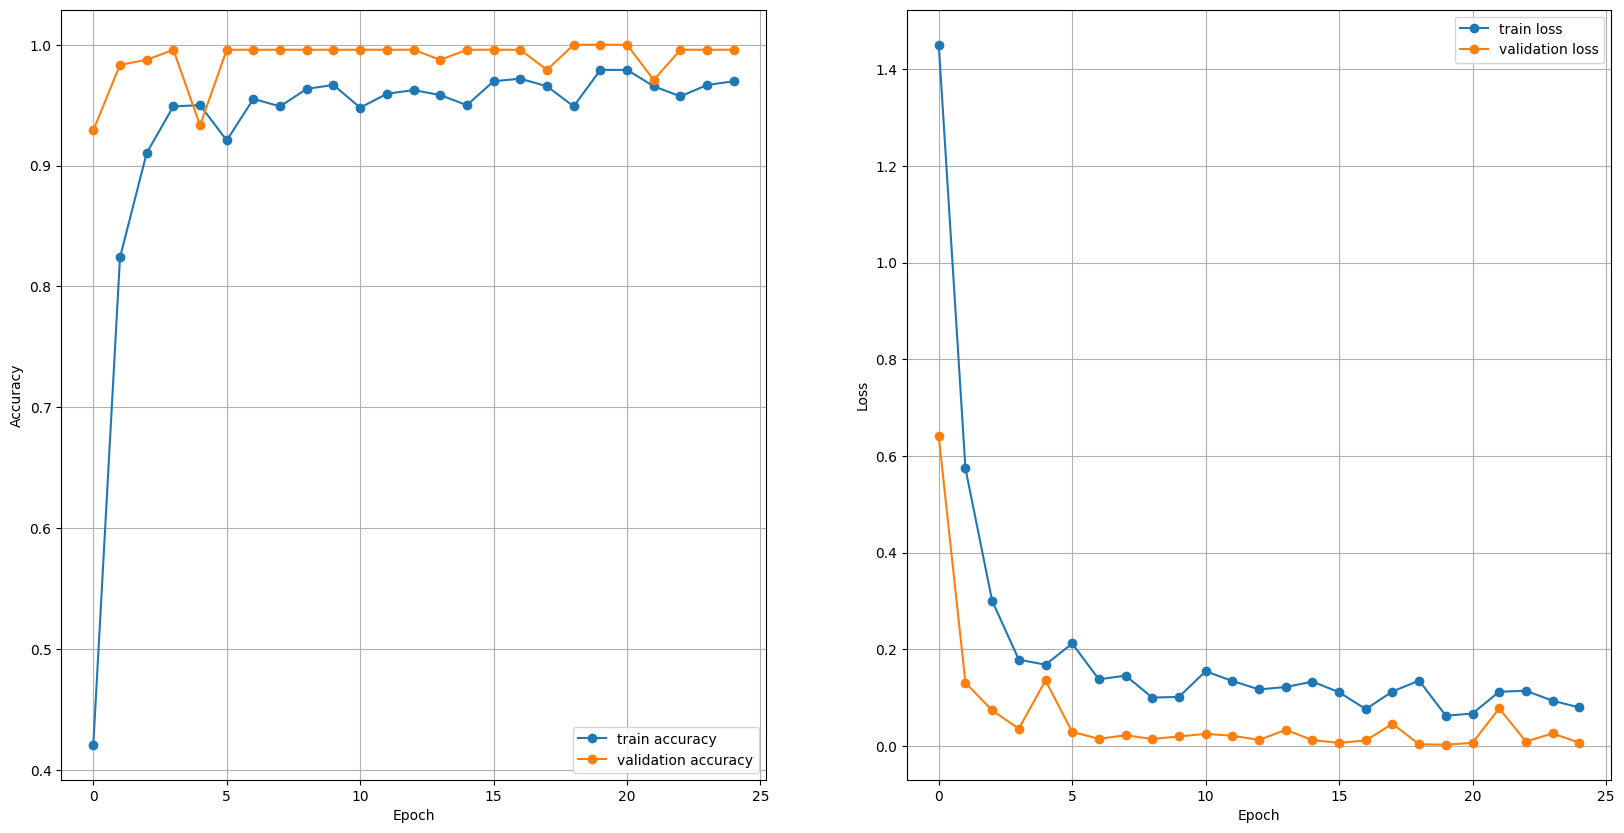

/tmp/ipykernel_78250/1803485848.py:264: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_resnet_model.pth'))
Validating: 100%|██████████|

Test Loss: 0.0056, Test Acc: 0.9967
Fine-tuning the model...
Fine-tuning Epoch 1/20


Validating: 100%|██████████| 15/15 [00:01<00:00, 11.79it/s]


Train Loss: 0.1411, Train Acc: 0.9635
Val Loss: 0.0052, Val Acc: 0.9958
Saved best fine-tuned model
Fine-tuning Epoch 2/20


Validating: 100%|██████████| 15/15 [00:01<00:00, 11.97it/s]


Train Loss: 0.0493, Train Acc: 0.9865
Val Loss: 0.0067, Val Acc: 0.9958
Fine-tuning Epoch 3/20


Validating: 100%|██████████| 15/15 [00:01<00:00, 11.92it/s]


Train Loss: 0.0465, Train Acc: 0.9896
Val Loss: 0.0065, Val Acc: 0.9958
Fine-tuning Epoch 4/20


Validating: 100%|██████████| 15/15 [00:01<00:00, 12.63it/s]


Train Loss: 0.0178, Train Acc: 0.9917
Val Loss: 0.0106, Val Acc: 0.9958
Fine-tuning Epoch 5/20


Validating: 100%|██████████| 15/15 [00:01<00:00, 11.99it/s]


Train Loss: 0.0063, Train Acc: 0.9990
Val Loss: 0.0032, Val Acc: 0.9958
Saved best fine-tuned model
Fine-tuning Epoch 6/20


Validating: 100%|██████████| 15/15 [00:01<00:00, 12.45it/s]


Train Loss: 0.0196, Train Acc: 0.9948
Val Loss: 0.0039, Val Acc: 0.9958
Fine-tuning Epoch 7/20


Validating: 100%|██████████| 15/15 [00:01<00:00, 12.59it/s]


Train Loss: 0.0075, Train Acc: 0.9990
Val Loss: 0.0035, Val Acc: 0.9958
Fine-tuning Epoch 8/20


Validating: 100%|██████████| 15/15 [00:01<00:00, 11.91it/s]


Train Loss: 0.0022, Train Acc: 0.9990
Val Loss: 0.0025, Val Acc: 1.0000
Saved best fine-tuned model
Fine-tuning Epoch 9/20


Validating: 100%|██████████| 15/15 [00:01<00:00, 11.57it/s]


Train Loss: 0.0021, Train Acc: 0.9990
Val Loss: 0.0011, Val Acc: 1.0000
Saved best fine-tuned model
Fine-tuning Epoch 10/20


Validating: 100%|██████████| 15/15 [00:01<00:00, 12.51it/s]


Train Loss: 0.0072, Train Acc: 0.9979
Val Loss: 0.0046, Val Acc: 0.9958
Fine-tuning Epoch 11/20


Validating: 100%|██████████| 15/15 [00:01<00:00, 12.61it/s]


Train Loss: 0.0027, Train Acc: 0.9990
Val Loss: 0.0015, Val Acc: 1.0000
Fine-tuning Epoch 12/20


Validating: 100%|██████████| 15/15 [00:01<00:00, 11.49it/s]


Train Loss: 0.0013, Train Acc: 1.0000
Val Loss: 0.0008, Val Acc: 1.0000
Saved best fine-tuned model
Fine-tuning Epoch 13/20


Validating: 100%|██████████| 15/15 [00:01<00:00,  9.38it/s]


Train Loss: 0.0010, Train Acc: 1.0000
Val Loss: 0.0002, Val Acc: 1.0000
Saved best fine-tuned model
Fine-tuning Epoch 14/20


Validating: 100%|██████████| 15/15 [00:01<00:00,  8.83it/s]


Train Loss: 0.0008, Train Acc: 1.0000
Val Loss: 0.0019, Val Acc: 1.0000
Fine-tuning Epoch 15/20


Validating: 100%|██████████| 15/15 [00:01<00:00, 10.64it/s]


Train Loss: 0.0028, Train Acc: 0.9990
Val Loss: 0.0006, Val Acc: 1.0000
Fine-tuning Epoch 16/20


Validating: 100%|██████████| 15/15 [00:01<00:00, 10.64it/s]


Train Loss: 0.0030, Train Acc: 0.9990
Val Loss: 0.0026, Val Acc: 1.0000
Fine-tuning Epoch 17/20


Validating: 100%|██████████| 15/15 [00:01<00:00, 10.16it/s]


Train Loss: 0.0003, Train Acc: 1.0000
Val Loss: 0.0007, Val Acc: 1.0000
Fine-tuning Epoch 18/20


Validating: 100%|██████████| 15/15 [00:01<00:00, 11.25it/s]


Train Loss: 0.0009, Train Acc: 1.0000
Val Loss: 0.0010, Val Acc: 1.0000
Early stopping at epoch 18


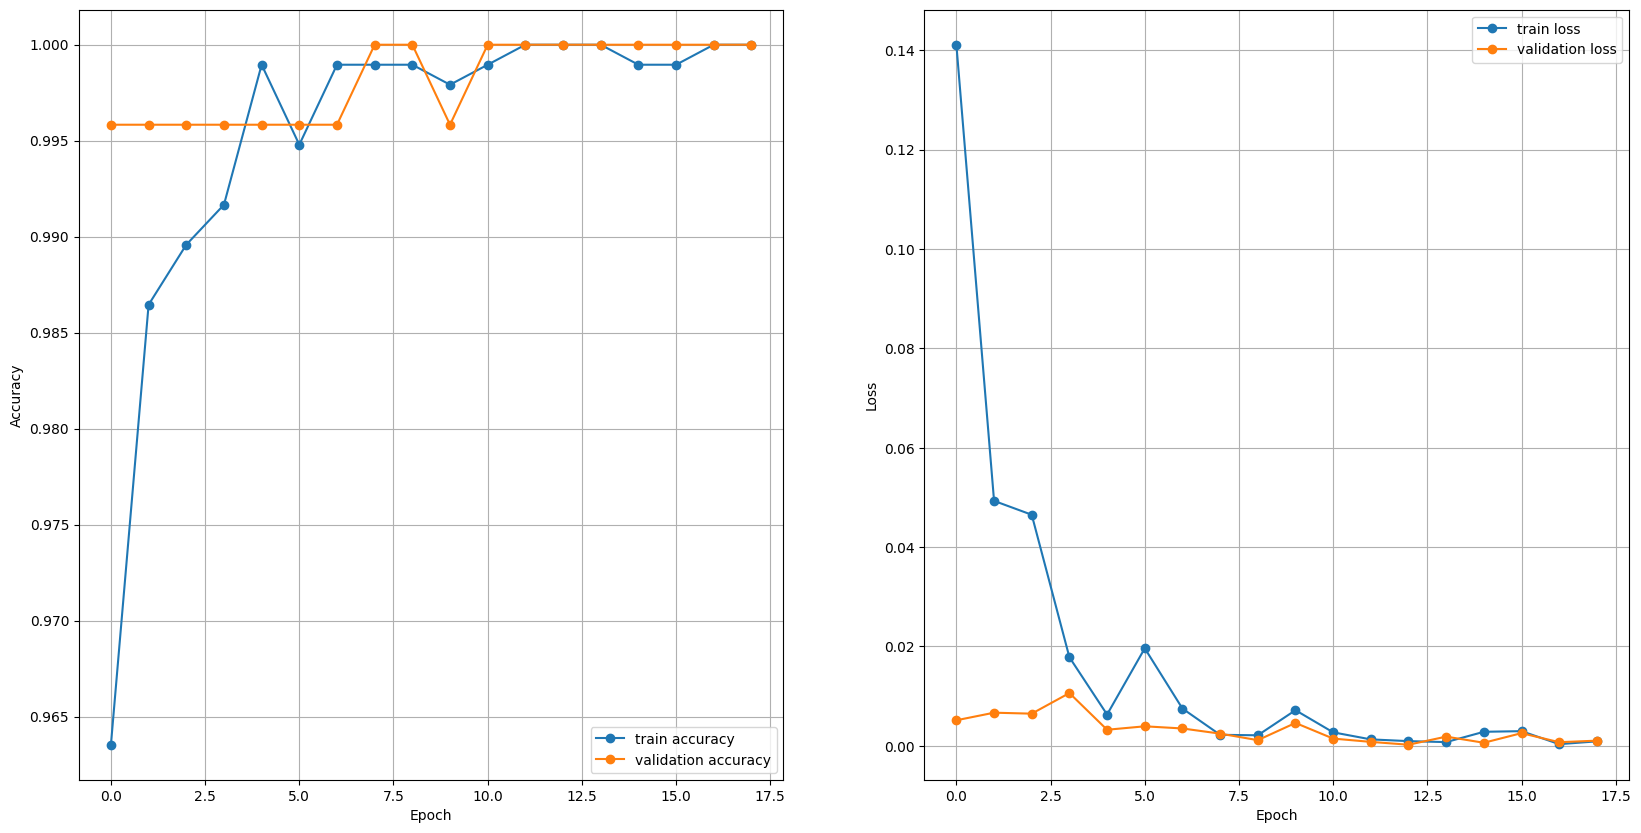

/tmp/ipykernel_78250/1803485848.py:345: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_finetuned_resnet_model.pth'))
Validating: 100%|█

Final Test Loss: 0.0000, Test Acc: 1.0000
Model saved in TorchScript format for deployment


In [ ]:
import os
import glob as gb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import models, transforms, datasets
from tqdm import tqdm

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Configuration
IMG_SIZE = 224
SEED = 1000
BATCH_SIZE = 16
TRAIN_DIR = '/media/rogerthattan/Toshiba/Thesis/Dataset/Train_Data'
TEST_DIR = '/media/rogerthattan/Toshiba/Thesis/Dataset/Test_Data'
NUM_EPOCHS = 50

# Set random seeds for reproducibility
torch.manual_seed(SEED)
np.random.seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)

# Analyze dataset
categories = []
class_count = []
train_exm = 0
for f in os.listdir(TRAIN_DIR):
    files = gb.glob(pathname=str(TRAIN_DIR + '/' + f + '/*.jpg'))
    categories.append(f)
    class_count.append(len(files))
    train_exm += len(files)

# Plot class distribution
sns.barplot(x=categories, y=class_count).set_title("Distribution of train data")
plt.show()
print(f"Total training examples: {train_exm}")
print(f"Number of classes: {len(categories)}")

# Define data transformations
train_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(),
    transforms.RandomResizedCrop(IMG_SIZE, scale=(0.8, 1.0)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.1, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load datasets
train_dataset = datasets.ImageFolder(root=TRAIN_DIR, transform=train_transform)
test_dataset = datasets.ImageFolder(root=TEST_DIR, transform=test_transform)

# Split training data into train and validation
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(
    train_dataset, [train_size, val_size], 
    generator=torch.Generator().manual_seed(SEED)
)

# Apply validation transform to validation dataset
val_dataset.dataset.transform = test_transform

# Create data loaders
train_loader = DataLoader(
    train_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True, 
    num_workers=4, 
    pin_memory=True
)

val_loader = DataLoader(
    val_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=False, 
    num_workers=4, 
    pin_memory=True
)

test_loader = DataLoader(
    test_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=False, 
    num_workers=4, 
    pin_memory=True
)

print(f"Train batches: {len(train_loader)}")
print(f"Validation batches: {len(val_loader)}")
print(f"Test batches: {len(test_loader)}")

# Define the model
class ResNetModel(nn.Module):
    def __init__(self, num_classes):
        super(ResNetModel, self).__init__()
        # Load pre-trained ResNet50
        self.resnet = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)
        
        # Freeze all layers in the base model
        for param in self.resnet.parameters():
            param.requires_grad = False
            
        # Replace the final fully connected layer
        num_features = self.resnet.fc.in_features
        self.resnet.fc = nn.Sequential(
            nn.Linear(num_features, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )
        
    def forward(self, x):
        return self.resnet(x)

# Initialize model
num_classes = len(categories)
model = ResNetModel(num_classes).to(device)
print("Model created successfully")

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.1, patience=3, verbose=True
)

# Training function
def train_epoch(model, dataloader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for inputs, labels in tqdm(dataloader, desc="Training"):
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
        # Statistics
        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / total
    epoch_acc = correct / total
    return epoch_loss, epoch_acc

# Validation function
def validate(model, dataloader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, labels in tqdm(dataloader, desc="Validating"):
            inputs, labels = inputs.to(device), labels.to(device)
            
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            # Statistics
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / total
    epoch_acc = correct / total
    return epoch_loss, epoch_acc

# Training loop
train_losses = []
train_accs = []
val_losses = []
val_accs = []
best_val_loss = float('inf')
patience = 5
counter = 0

for epoch in range(NUM_EPOCHS):
    print(f"Epoch {epoch+1}/{NUM_EPOCHS}")
    
    # Train
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    
    # Validate
    val_loss, val_acc = validate(model, val_loader, criterion, device)
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    
    # Update learning rate
    scheduler.step(val_loss)
    
    # Print statistics
    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
    print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
    
    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
        # Save the best model
        torch.save(model.state_dict(), 'best_resnet_model.pth')
        print("Saved best model")
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

# Plot training history
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(train_accs, 'o-', label='train accuracy')
plt.plot(val_accs, 'o-', label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(train_losses, 'o-', label='train loss')
plt.plot(val_losses, 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

# Load the best model for evaluation
model.load_state_dict(torch.load('best_resnet_model.pth'))

# Evaluate on test data
test_loss, test_acc = validate(model, test_loader, criterion, device)
print(f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

# Fine-tuning (optional)
print("Fine-tuning the model...")

# Unfreeze some layers of ResNet
for param in model.resnet.layer4.parameters():
    param.requires_grad = True

# Use a smaller learning rate for fine-tuning
optimizer = optim.Adam(model.parameters(), lr=0.0001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.1, patience=2, verbose=True
)

# Fine-tuning loop
ft_train_losses = []
ft_train_accs = []
ft_val_losses = []
ft_val_accs = []
best_val_loss = float('inf')
patience = 5
counter = 0

for epoch in range(20):  # Fewer epochs for fine-tuning
    print(f"Fine-tuning Epoch {epoch+1}/20")
    
    # Train
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
    ft_train_losses.append(train_loss)
    ft_train_accs.append(train_acc)
    
    # Validate
    val_loss, val_acc = validate(model, val_loader, criterion, device)
    ft_val_losses.append(val_loss)
    ft_val_accs.append(val_acc)
    
    # Update learning rate
    scheduler.step(val_loss)
    
    # Print statistics
    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
    print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
    
    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
        # Save the best fine-tuned model
        torch.save(model.state_dict(), 'best_finetuned_resnet_model.pth')
        print("Saved best fine-tuned model")
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

# Plot fine-tuning history
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(ft_train_accs, 'o-', label='train accuracy')
plt.plot(ft_val_accs, 'o-', label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(ft_train_losses, 'o-', label='train loss')
plt.plot(ft_val_losses, 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

# Load the best fine-tuned model for final evaluation
model.load_state_dict(torch.load('best_finetuned_resnet_model.pth'))

# Final evaluation on test data
test_loss, test_acc = validate(model, test_loader, criterion, device)
print(f"Final Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

# Save the final model in TorchScript format for deployment
model.eval()
example = torch.rand(1, 3, IMG_SIZE, IMG_SIZE).to(device)
traced_script_module = torch.jit.trace(model, example)
traced_script_module.save("resnet_model_scripted.pt")
print("Model saved in TorchScript format for deployment")